<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [3]:
#Name:Shichao Lu
#USC ID: 2523-3537-16
import pandas as pd
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [23]:
data = pd.read_csv('Salaries.csv',index_col='playerID',header=0,skiprows=[2])

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [27]:
import pandas as pd
data = pd.read_csv('Salaries.csv',index_col='playerID',header=0,skiprows=[2])
results = data[((data.teamID == 'ATL') | (data.teamID == 'HOU')) & (data.salary > 1000000)]
print (results)

           yearID teamID lgID   salary
playerID                              
hornebo01    1985    ATL   NL  1500000
murphda05    1985    ATL   NL  1625000
suttebr01    1985    ATL   NL  1354167
ryanno01     1985    HOU   NL  1350000
hornebo01    1986    ATL   NL  1800000
...           ...    ...  ...      ...
quallch01    2015    HOU   AL  3000000
rasmuco01    2015    HOU   AL  8000000
singljo02    2015    HOU   AL  2000000
sippto01     2015    HOU   AL  2400000
valbulu01    2015    HOU   AL  4200000

[595 rows x 4 columns]


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [4]:
import pandas as pd
data = pd.read_csv('Salaries.csv',index_col='playerID',header=0,skiprows=[2])
data_ATL = data[data.teamID == 'ATL']
data_ATL_std = data_ATL.std(axis=0)
data_ATL_mean = data_ATL.mean(axis=0)
data_ATL_max = data_ATL.max(axis=0)
data_ATL_quantile = data_ATL.quantile([0.25,0.5,0.75])
data.describe()

,yearID,salary
count,25574.000000,2.557400e+04
mean,2000.374990,2.008620e+06
std,8.610235,3.315758e+06
min,1985.000000,0.000000e+00
25%,1993.000000,2.750000e+05
50%,2000.000000,5.500000e+05
75%,2008.000000,2.250000e+06
max,2015.000000,3.300000e+07


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [54]:
#data = pd.read_csv('Salaries.csv',index_col='playerID',header=0,skiprows=[2])
#data = data[data.teamID == 'ATL']
#list = []
#for index, row in df.iterrows():
#    my_dict = {index : row}
#    list.append(my_dict)
#print(list)
data = pd.read_csv('Salaries.csv',index_col='playerID',header=0,skiprows=[2])
data = data[data.teamID == 'ATL']
result = data.to_dict(orient='records')
print(result)

[{'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 870000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 545000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 633333}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 625000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 800000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 150000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 483333}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 772000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 250000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 1500000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 455000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 407500}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 275000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 775000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'salary': 16

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [56]:
df = pd.DataFrame(result)
df.columns = ['a', 'b', 'c', 'd']
print(df)

        a    b   c        d
0    1985  ATL  NL   870000
1    1985  ATL  NL   545000
2    1985  ATL  NL   633333
3    1985  ATL  NL   625000
4    1985  ATL  NL   800000
..    ...  ...  ..      ...
880  2015  ATL  NL  3000000
881  2015  ATL  NL  1000000
882  2015  ATL  NL   507500
883  2015  ATL  NL   520000
884  2015  ATL  NL  1000000

[885 rows x 4 columns]


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [57]:
import numpy as np
list = [[1,2,3],[4,5,6]]
arr = np.array(list)
print(arr)

[[1 2 3]
 [4 5 6]]


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [62]:
import numpy as np
arr = np.array([[1, 2], [3, 4],[5,6]])
print(arr.ndim)
print(arr.size)
print(arr.shape)
print(arr.dtype)
print(arr.itemsize)
print(arr.data)

2
6
(3, 2)
int64
8


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [63]:
arr = np.array([[1, 2], [3, 4],[5,6]])
arr.flatten()

array([1, 2, 3, 4, 5, 6])

#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [64]:
arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
print(arr[1:])
arr[1:, 0:2]

[[3 4 6]
 [7 8 9]]


array([[3, 4],
       [7, 8]])

#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [65]:
arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
np.square(arr)
print(np.argmin(arr))
print(np.argmax(arr))
np.mean(arr)
np.sum(arr)
np.sign(arr)
np.mod(arr,2)

0
8


array([[1, 0, 1],
       [1, 0, 0],
       [1, 0, 1]])

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [66]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[25.         20.01385042 15.58171745 11.70360111  8.37950139  5.60941828
  3.3933518   1.73130194  0.6232687   0.06925208  0.06925208  0.6232687
  1.73130194  3.3933518   5.60941828  8.37950139 11.70360111 15.58171745
 20.01385042 25.        ]


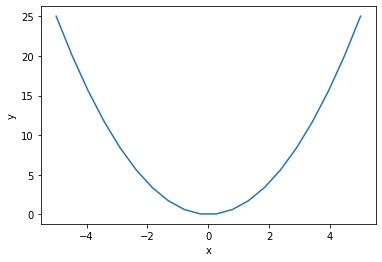

In [71]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
print(x)
y = np.array([j ** 2 for j in x])
print(y)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

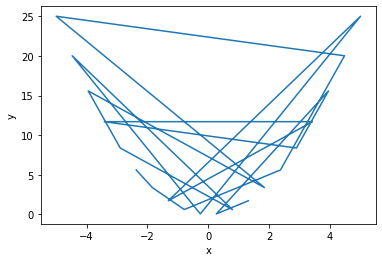

In [72]:
x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

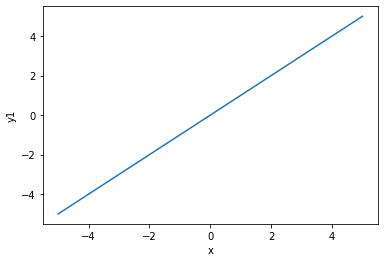

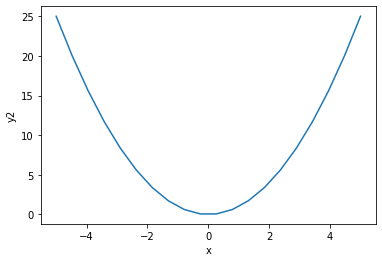

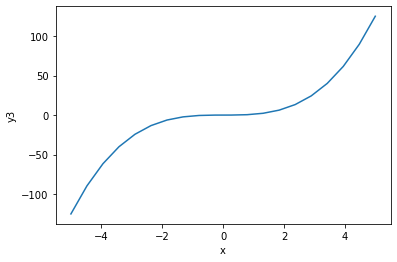

In [73]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.show()

plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y2')
plt.show()

plt.plot(x, y3)
plt.xlabel('x')
plt.ylabel('y3')
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

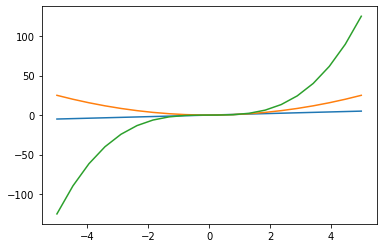

In [82]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

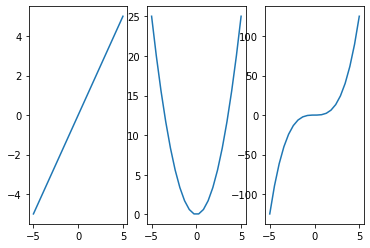

In [86]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
plt.show()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

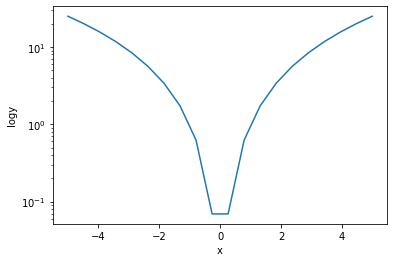

In [97]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

fig, ax = plt.subplots()

ax.plot(x, y)


ax.set_yscale('log')

plt.xlabel('x')
plt.ylabel('logy')

plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

           yearID teamID lgID    salary
playerID                               
barkele01    1985    ATL   NL    870000
bedrost01    1985    ATL   NL    550000
benedbr01    1985    ATL   NL    545000
campri01     1985    ATL   NL    633333
ceronri01    1985    ATL   NL    625000
...           ...    ...  ...       ...
treinbl01    2015    WAS   NL    512800
ugglada01    2015    WAS   NL    507500
werthja01    2015    WAS   NL  21000000
zimmejo02    2015    WAS   NL  16500000
zimmery01    2015    WAS   NL  14000000

[25575 rows x 4 columns]


<AxesSubplot:title={'center':'Scatterplot between yearID and salary'}, xlabel='salary', ylabel='yearID'>

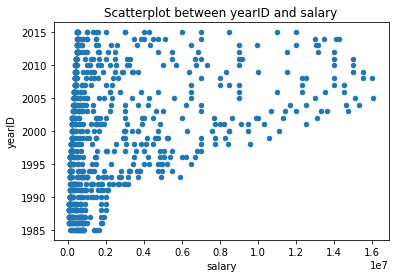

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Salaries.csv',index_col='playerID')
df = pd.DataFrame(data)
cols_with_team_ATL = df.loc[df.teamID=="ATL" ]

cols_with_team_ATL.plot.scatter(x = 'salary', y = 'yearID', title="Scatterplot between yearID and salary")


(b) For year 1985, plot a bar chart to show the average salary for each team.

teamID
ATL    673045.454545
BAL    525486.909091
BOS    435902.400000
CAL    515281.928571
CHA    468865.619048
CHN    577405.318182
CIN    379996.227273
CLE    327583.300000
DET    517407.150000
HOU    499652.550000
KCA    423689.954545
LAN    476865.956522
MIN    303411.631579
ML4    593900.368421
MON    473508.300000
NYA    711910.200000
NYN    515941.047619
OAK    431362.190476
PHI    532892.947368
PIT    485657.894737
SDN    501662.863636
SEA    256277.777778
SFN    411085.700000
SLN    472683.320000
TEX    383825.000000
TOR    440627.500000
Name: salary, dtype: float64


<AxesSubplot:title={'center':'Average Salary for each team for the year 1985'}, xlabel='teamID'>

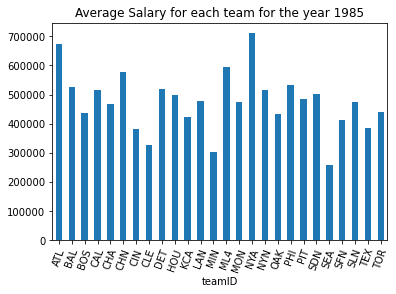

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Salaries.csv',index_col='playerID')
df = pd.DataFrame(data)
cols_with_year_1985 = df[df.yearID == 1985]
results = cols_with_year_1985.groupby('teamID')['salary'].mean()
print(results)
results.plot.bar(x='teamID', y="salary", rot=70, title="Average Salary for each team for the year 1985")

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

yearID
1985    6.730455e+05
1986    5.897512e+05
1987    5.170175e+05
1988    4.389026e+05
1989    3.704111e+05
1990    4.548594e+05
1991    7.361400e+05
1992    1.116946e+06
1993    1.261861e+06
1994    1.646117e+06
1995    1.628808e+06
1996    1.656617e+06
1997    1.686403e+06
1998    1.912062e+06
1999    2.522069e+06
2000    2.817928e+06
2001    2.965683e+06
2002    3.316799e+06
2003    3.934951e+06
2004    3.220804e+06
2005    3.458292e+06
2006    3.108858e+06
2007    3.117530e+06
2008    3.412189e+06
2009    3.335385e+06
2010    3.126802e+06
2011    3.346257e+06
2012    2.856205e+06
2013    3.254501e+06
2014    4.067042e+06
2015    2.990885e+06
Name: salary, dtype: float64


<AxesSubplot:title={'center':'Average Salary for each team for the year 1985'}, xlabel='yearID'>

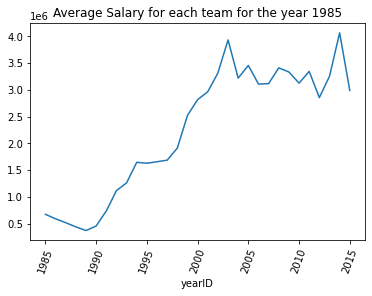

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Salaries.csv',index_col='playerID')
data_ATL = df.loc[df.teamID == 'ATL']
results = data_ATL.groupby('yearID')['salary'].mean()
print(results)
results.plot.line(x='teamID', y="salary", rot=70, title="Average Salary for each team for the year 1985")

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

           yearID teamID lgID   salary   num_feat
playerID                                         
barkele01    1985    ATL   NL   870000  12.832509
bedrost01    1985    ATL   NL   550000  71.179490
benedbr01    1985    ATL   NL   545000  77.545324
campri01     1985    ATL   NL   633333  26.069109
ceronri01    1985    ATL   NL   625000  18.690471
...           ...    ...  ...      ...        ...
simmoan01    2015    ATL   NL  3000000  96.748463
teherju01    2015    ATL   NL  1000000   6.403614
terdojo01    2015    ATL   NL   507500  53.636137
woodal02     2015    ATL   NL   520000  31.254585
younger03    2015    ATL   NL  1000000  53.278369

[886 rows x 5 columns]


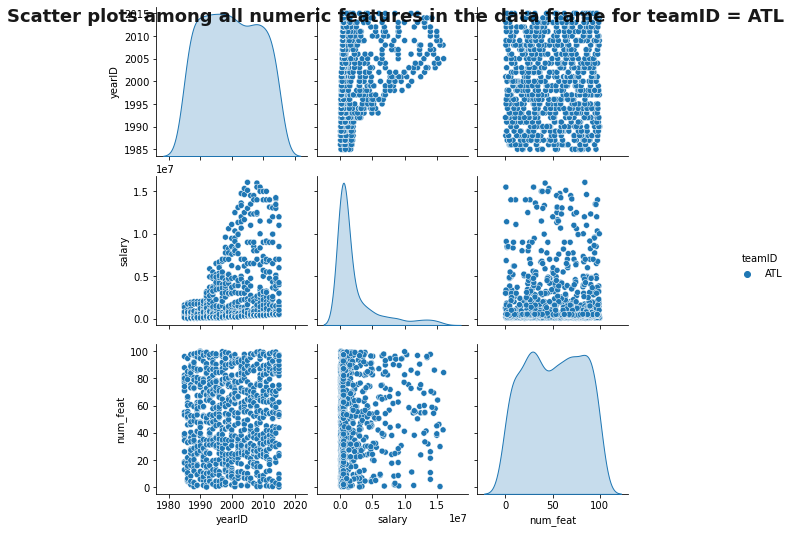

In [169]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('Salaries.csv',index_col='playerID')
df['num_feat'] = 100 * np.random.random_sample(df.shape[0])
df = df[df.teamID == 'ATL']
print(df)
pairplot_fig = sns.pairplot(df,vars=['yearID', 'salary', 'num_feat'],hue='teamID')
pairplot_fig.fig.suptitle("Scatter plots among all numeric features in the data frame for teamID = ATL", fontsize=18, alpha=0.9, weight='bold')
plt.show()

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

           yearID teamID lgID   salary
playerID                              
barkele01    1985    ATL   NL   870000
bedrost01    1985    ATL   NL   550000
benedbr01    1985    ATL   NL   545000
campri01     1985    ATL   NL   633333
ceronri01    1985    ATL   NL   625000
...           ...    ...  ...      ...
mosebll01    1985    TOR   AL   587500
mullira01    1985    TOR   AL   325000
stiebda01    1985    TOR   AL  1000000
upshawi01    1985    TOR   AL   730000
whitter01    1985    TOR   AL   370000

[550 rows x 4 columns]


<AxesSubplot:xlabel='teamID', ylabel='salary'>

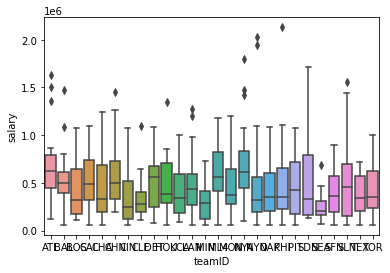

In [186]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('Salaries.csv',index_col='playerID')
df = df[df.yearID == 1985]
#df = df.groupby('yearID')['salary'].mean()
print(df)
sns.boxplot(x='teamID', y='salary', data=df, orient='v')

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.

In [ ]:
$ git init    // Initializing git in the working directory

$ git checkout -b dev   // new branch 'dev' generated
$ git branch            // check the current branch pointed to
$ git add filename      // add file to the current git branch
$ git commit -a -m 'added file to master'  // commit with a message
$ git status            // check the git status

$ git checkout -b master  // new branch 'master' created 
$ git branch              // check the current branch pointed to
$ git merge dev           // merging branch 'dev' with master branch


In [ ]:
$ git remote add origin git@github.com:username/new_repo   //$ git remote add origin https://github.com/username/new_repo
$ git push -u origin master    // pushing code to github repository
$ git commit -a -m 'pushed code to repository'

$ git checkout dev   // git pointing to 'dev' in local repository
$ git branch         // check the current branch pointed to

//modify the file by changing something in it
$ git add filename
$ git commit -a -m 'modified file'
$ git merge dev        // merging branch 'dev' with master branch
$ git checkout master
$ git branch
$ git push -u origin master    // pushing code to github repository
$ git commit -a -m 'pushed modified code to repository'
